<a href="https://colab.research.google.com/github/trucchau171/opticalFlow_HornSchunck/blob/main/OF_HornSchunck.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
%cd /content/drive/MyDrive/Colab Notebooks/Optical_Flow

In [ ]:
!git clone https://github.com/trucchau171/opticalFlow_HornSchunck.git

In [ ]:
%cd opticalFlow_HornSchunck/


In [22]:
!git config --global user.name "trucchau171"
!git config --global user.password "moechannya1710"
!git config --global user.email "chauthanhtruc2002@gmail.com"

In [24]:
!git remote rm origin

In [25]:
!git remote add origin https://github.com/trucchau171/opticalFlow_HornSchunck.git

In [26]:
!git remote -v

origin	https://github.com/trucchau171/opticalFlow_HornSchunck.git (fetch)
origin	https://github.com/trucchau171/opticalFlow_HornSchunck.git (push)


In [28]:
!git remote set-url origin git@github.com:trucchau171/opticalFlow_HornSchunck.git

In [30]:
!git push --set-upstream origin main

Host key verification failed.
fatal: Could not read from remote repository.

Please make sure you have the correct access rights
and the repository exists.


In [9]:
!git add .
!git commit -m "test commit"
!git push


*** Please tell me who you are.

Run

  git config --global user.email "you@example.com"
  git config --global user.name "Your Name"

to set your account's default identity.
Omit --global to set the identity only in this repository.

fatal: unable to auto-detect email address (got 'root@25583c9f718f.(none)')
fatal: could not read Username for 'https://github.com': No such device or address


In [ ]:

!git push -u origin master

error: src refspec master does not match any
error: failed to push some refs to 'https://github.com/trucchau171/opticalFlow_HornSchunck.git'


In [ ]:
!git config --global user.name "trucchau171"
!git config --global user.password "moechannya1710"
!git config --global user.email "chauthanhtruc2002@gmail.com"

In [ ]:
pip install flow_vis

In [ ]:
# import libraries
import cv2
import numpy as np
from matplotlib import pyplot as plt
from scipy import ndimage
import os
import flow_vis
from google.colab.patches import cv2_imshow


In [ ]:
!curl -s --retry 9999 \
-o "frame10.png" \
"https://raw.githubusercontent.com/chzylucky/Optical_Flow_HS_LK/master/Optical_Flow_chzy/basketball1.png"
!curl -s --retry 9999 \
-o "frame11.png" \
"https://raw.githubusercontent.com/chzylucky/Optical_Flow_HS_LK/master/Optical_Flow_chzy/basketball2.png"


In [ ]:

frames_2d = []
for i in range(2):
    img = cv2.imread("frame1" + str(i) + ".png", cv2.IMREAD_GRAYSCALE).astype(float)
    frames_2d.append(img)

In [ ]:
frames_2d[0]

array([[82., 82., 68., ..., 88., 91., 91.],
       [90., 99., 66., ..., 86., 90., 91.],
       [64., 64., 66., ..., 83., 85., 87.],
       ...,
       [77., 76., 77., ..., 18., 18., 17.],
       [77., 76., 77., ..., 18., 18., 17.],
       [76., 76., 78., ..., 18., 18., 18.]])

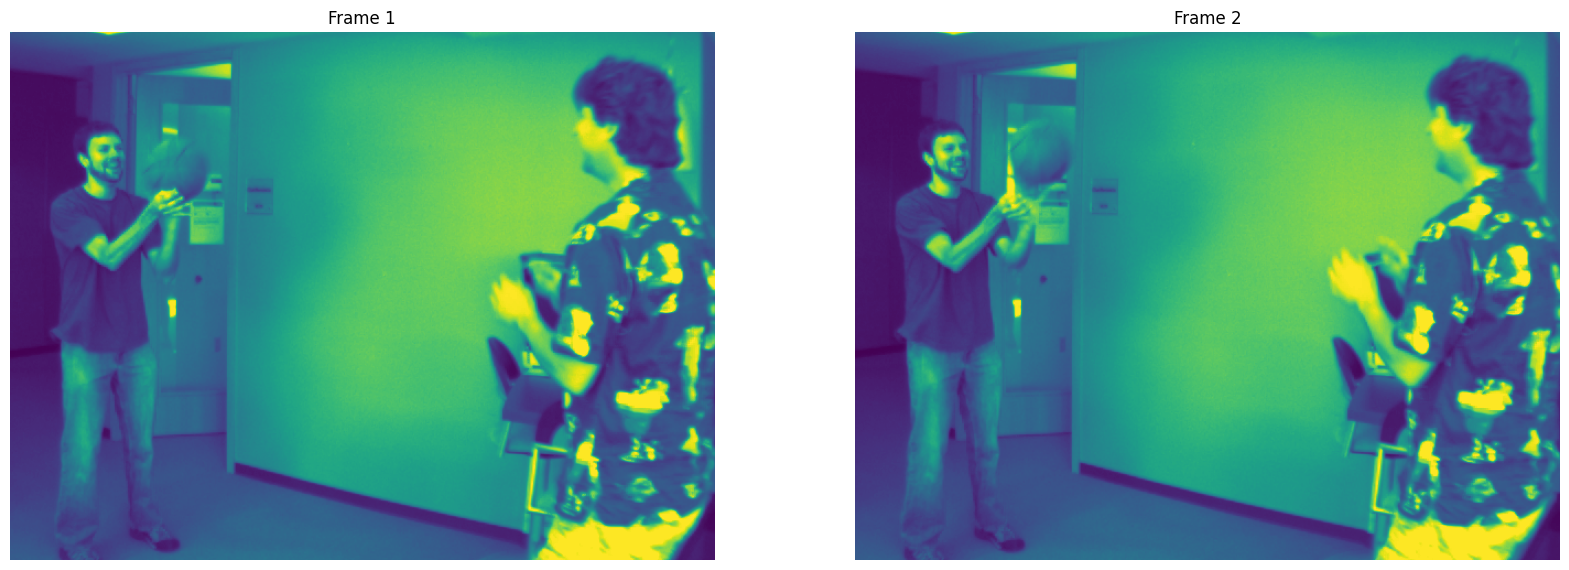

In [ ]:
# plot all consecutive 2D frames
fig = plt.figure(figsize=(20, 15))
rows, cols = 1, 2
for i in range(len(frames_2d)):
    fig.add_subplot(rows, cols, i+1)
    plt.imshow(frames_2d[i])
    plt.axis('off')
    plt.title('Frame ' + str(i+1))

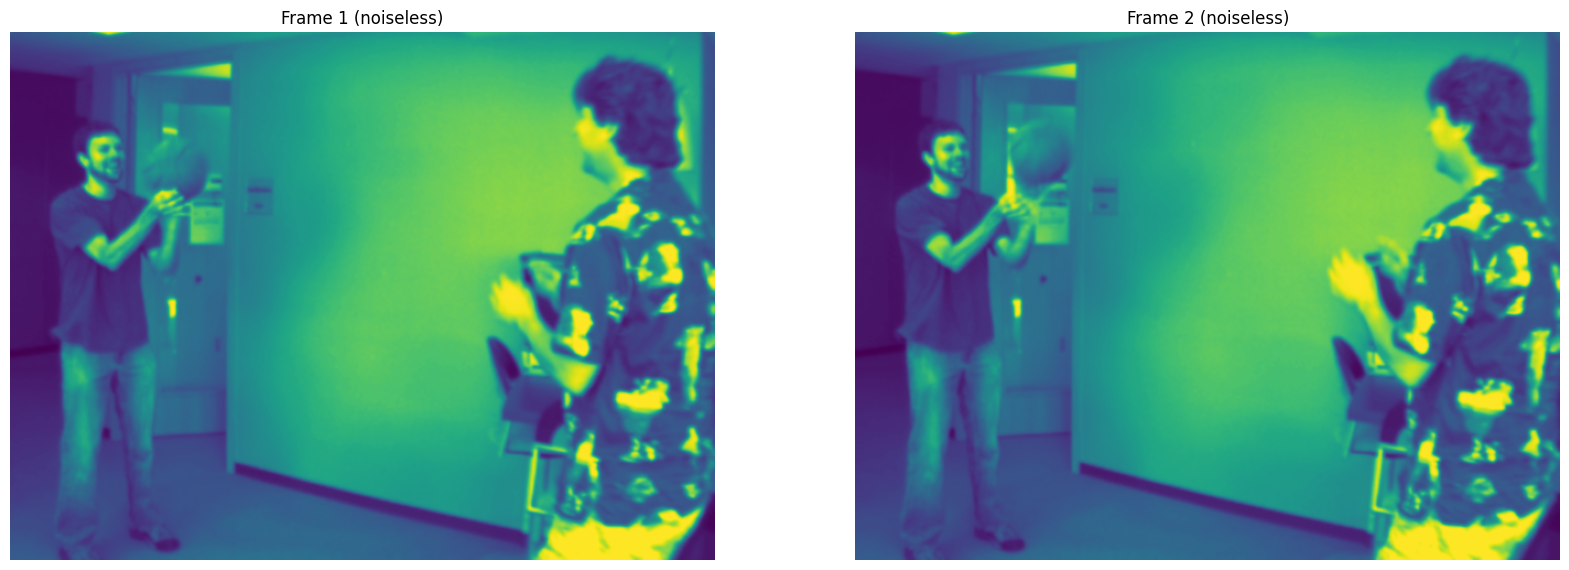

In [ ]:
# remove noise from frames using a 5 by 5 Gaussian kernel
frames_noiseless = []
for i in range(len(frames_2d)):
    img = cv2.GaussianBlur(frames_2d[i], (5, 5), 0)
    frames_noiseless.append(img)

fig = plt.figure(figsize=(20, 15))
rows, cols = 1, 2
for i in range(len(frames_noiseless)):
    fig.add_subplot(rows, cols, i+1)
    plt.imshow(frames_noiseless[i])
    plt.axis('off')
    plt.title('Frame ' + str(i+1) + " (noiseless)")

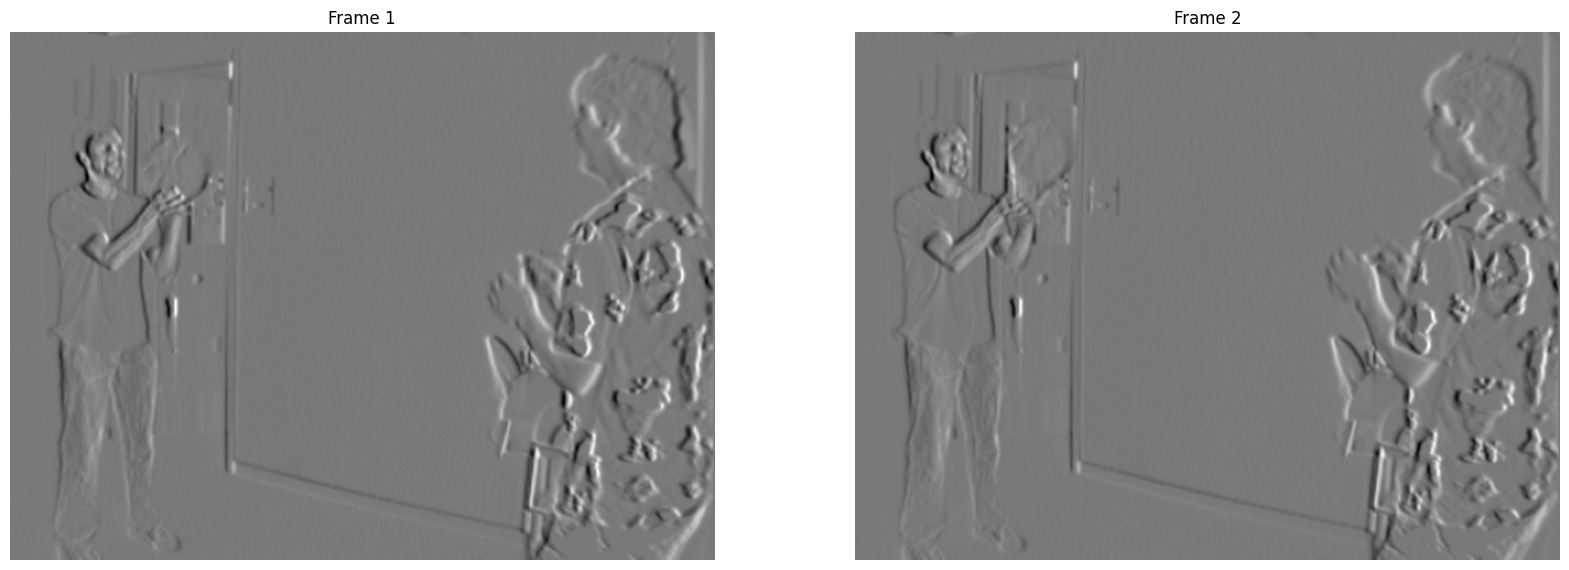

In [ ]:
# calculate first derivative in X direction using a 2D filter
x_kernel = np.array([[-1, 1], [-1, 1]]) * 0.25
all_fx = []
for img in frames_noiseless:
    fx = ndimage.convolve(img, x_kernel)
    all_fx.append(fx)

# plot the first derivative of each frame along X
fig = plt.figure(figsize=(20, 15))
rows, cols = 1, 2
for i in range(len(all_fx)):
    fig.add_subplot(rows, cols, i+1)
    plt.imshow(all_fx[i], cmap='gray')
    plt.axis('off')
    plt.title('Frame ' + str(i+1))

In [ ]:
# calculate first derivative in Y direction using a 2D filter
y_kernel = np.array([[-1, -1], [1, 1]]) * 0.25
all_fy = []
for img in frames_noiseless:
    fy = ndimage.convolve(img, y_kernel)
    all_fy.append(fy)

# plot the first derivative of each frame along Y
fig = plt.figure(figsize=(20, 15))
rows, cols = 1, 2
for i in range(len(all_fy)):
    fig.add_subplot(rows, cols, i+1)
    plt.imshow(all_fy[i], cmap='gray')
    plt.axis('off')
    plt.title('Frame ' + str(i+1))

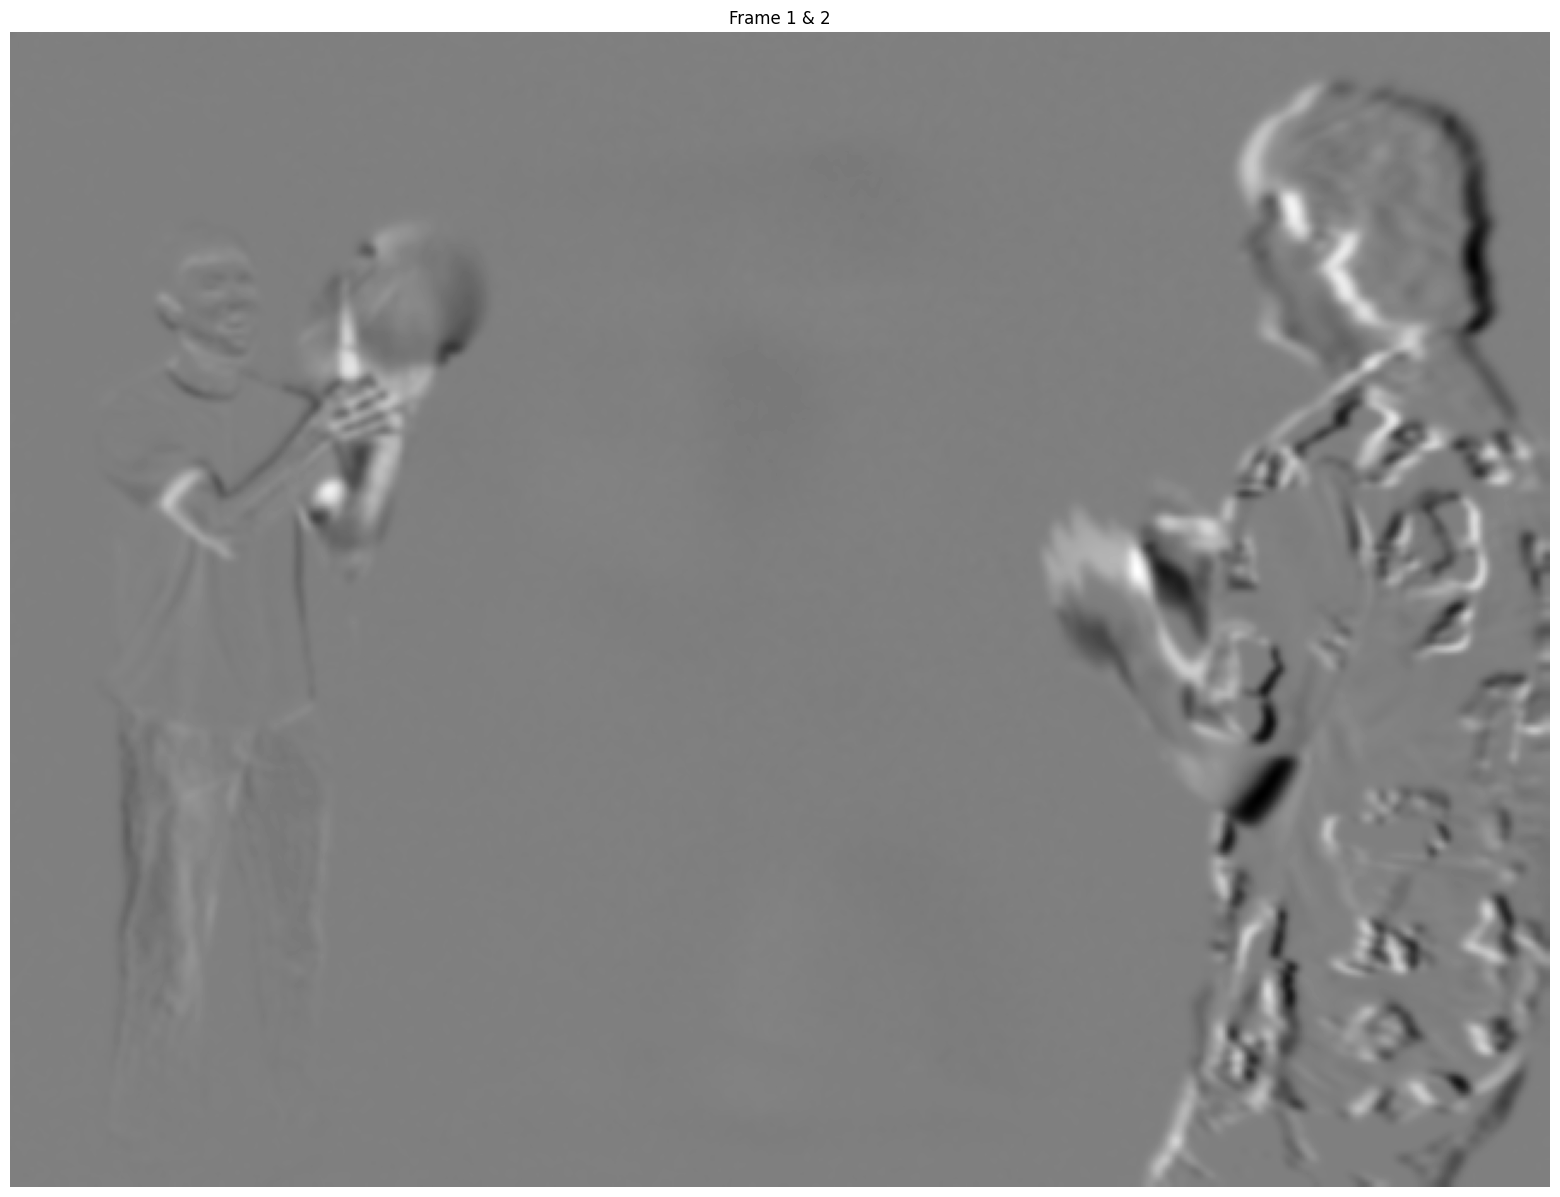

In [ ]:
# calculate first derivative in t direction using a 2D filter
t_kernel = np.ones((2, 2)) * 0.25
all_ft = []
for i in range(len(frames_noiseless)-1):
    ft = ndimage.convolve(frames_noiseless[i], -t_kernel) + \
         ndimage.convolve(frames_noiseless[i+1], t_kernel)
    all_ft.append(ft)

# plot the first derivative of each frame along t
fig = plt.figure(figsize=(20, 15))
rows, cols = 1, 1
for i in range(len(all_ft)):
    fig.add_subplot(rows, cols, i+1)
    plt.imshow(all_ft[i], cmap='gray')
    plt.axis('off')
    plt.title('Frame ' + str(i+1) + ' & ' + str(i+2))

In [ ]:
# set up initial values for u and v
# for the averages of u and v, a kernel that considers 8 points around each pixel is used
h, w = frames_noiseless[0].shape
u = np.zeros((h, w))
v = np.zeros((h, w))
avg_kernel = np.array([[1/12, 1/6, 1/12], [1/6, 0, 1/6], [1/12, 1/6, 1/12]], float)

In [ ]:
# calculate u and v vectors using an iteration approach
fx_sum = sum(all_fx)
fy_sum = sum(all_fy)
ft_sum = sum(all_ft)
alpha = 15
delta = 0.1
iter_counter = 0
while True:
    iter_counter += 1
    u_avg = ndimage.convolve(u, avg_kernel)
    v_avg = ndimage.convolve(v, avg_kernel)
    p = fx_sum * u_avg + fy_sum * v_avg + ft_sum
    d = 4 * alpha**2 + fx_sum**2 + fy_sum**2
    prev = u
    u = u_avg - fx_sum * (p / d)
    v = v_avg - fy_sum * (p / d)
    diff = np.linalg.norm(u - prev, 2)

    # converges check (at most 300 iterations)
    if  diff < delta or iter_counter >= 300:
        print("the number of iterations: ", iter_counter)
        break

the number of iterations:  300


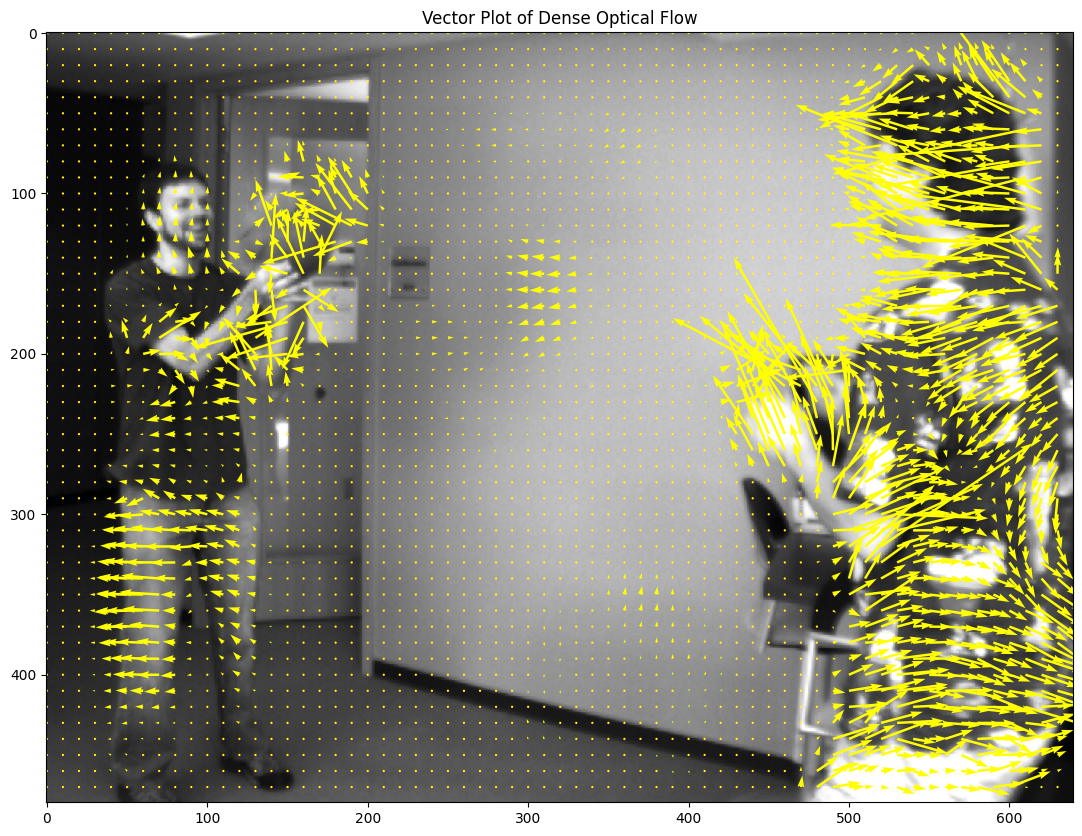

In [ ]:
# downsize u and v
u_deci = u[np.ix_(range(0, h, 10), range(0, w, 10))]
v_deci = v[np.ix_(range(0, h, 10), range(0, w, 10))]

# get coordinate for u and v in the original frame
[X,Y] = np.meshgrid(np.arange(w, dtype = 'float64'), np.arange(h, dtype = 'float64'))
X_deci = X[np.ix_(range(0, h, 10), range(0, w, 10))]
Y_deci = Y[np.ix_(range(0, h, 10), range(0, w, 10))]

# plot optical flow field
plt.figure(figsize=(15, 10))
plt.title('Vector Plot of Dense Optical Flow')
plt.imshow(frames_2d[0], cmap = 'gray')
plt.quiver(X_deci, Y_deci, u_deci, v_deci, color='yellow')
plt.show()

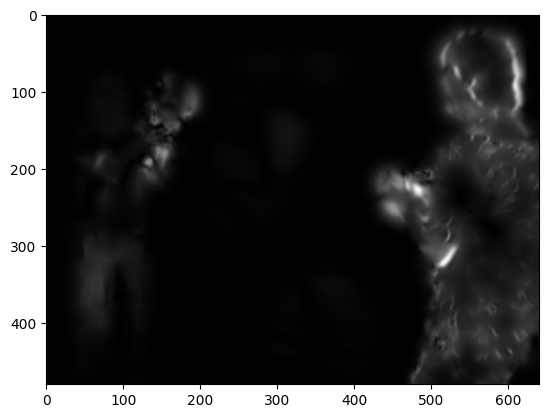

In [ ]:
hsv = np.zeros( (h,w,3), dtype = np.uint8)
hsv[...,1] = 0
mag, ang = cv2.cartToPolar(u, v)
hsv[...,0] = ang*180/np.pi/2
hsv[...,2] = cv2.normalize(mag,None,0,255,cv2.NORM_MINMAX)
rgb = cv2.cvtColor(hsv,cv2.COLOR_HSV2BGR)
plt.imshow(rgb)

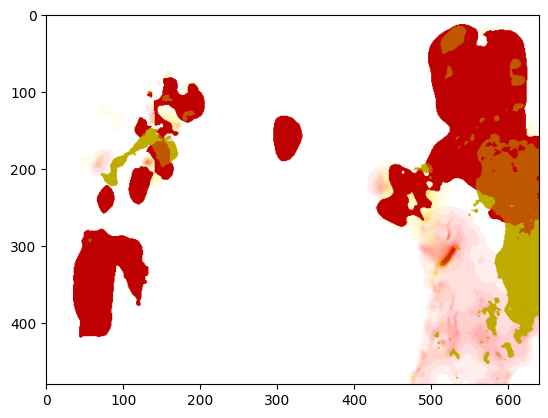

In [ ]:
flow_uv = np.zeros( (h,w,2), dtype = np.uint8)
flow_uv[...,0] = u
flow_uv[...,1] = v
flow_color = flow_vis.flow_to_color(flow_uv, convert_to_bgr=False)
plt.imshow(flow_color)
plt.show()

<ipython-input-33-7079e4fc5525>:4: DeprecationWarning: Please use `convolve` from the `scipy.ndimage` namespace, the `scipy.ndimage.filters` namespace is deprecated.
  from scipy.ndimage.filters import convolve as filter2


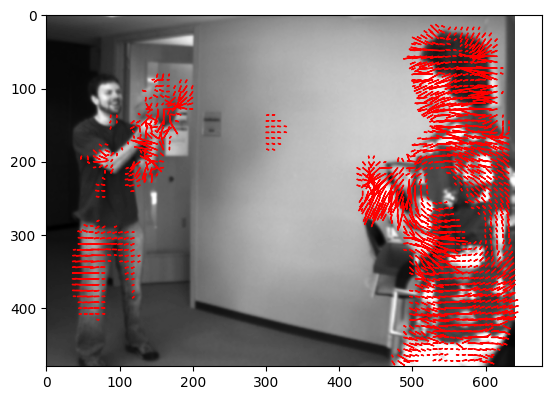

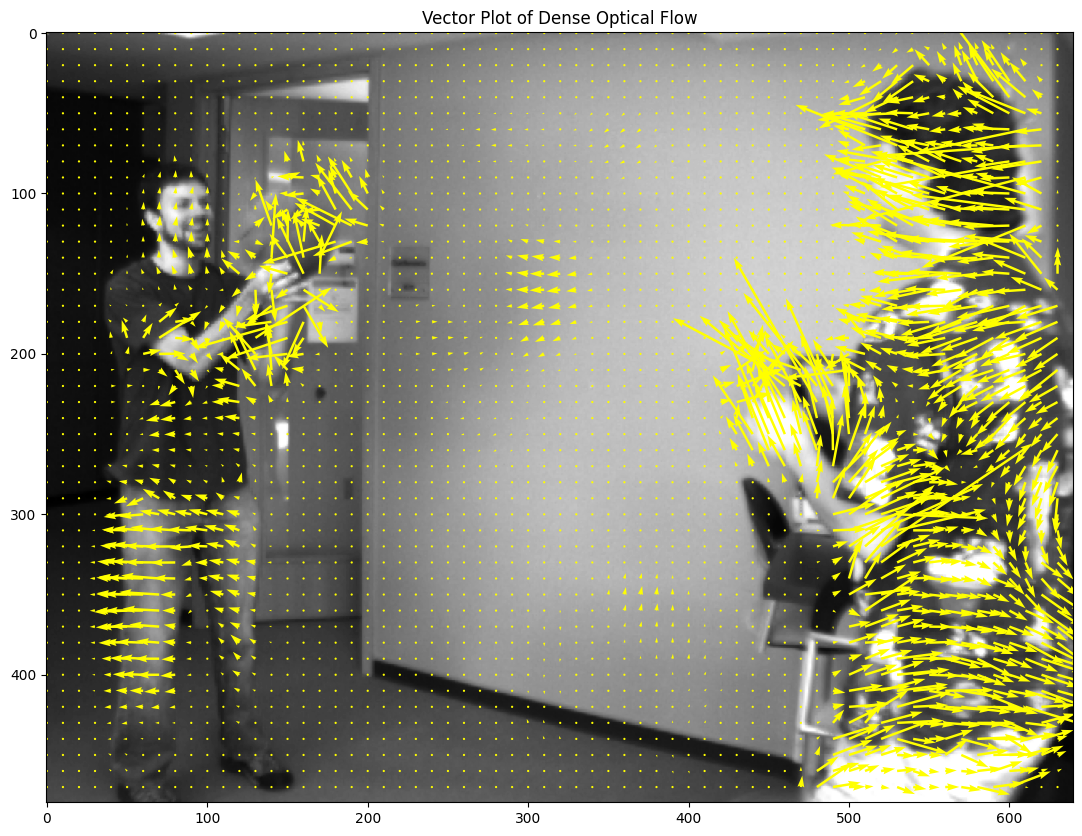

In [ ]:

import cv2
import numpy as np
from matplotlib import pyplot as plt
from scipy.ndimage.filters import convolve as filter2
import os
from argparse import ArgumentParser

"""
see readme for running instructions
"""


def show_image(name, image):
    if image is None:
        return

    cv2.imshow(name, image)
    cv2.waitKey(0)
    cv2.destroyAllWindows()



#compute magnitude in each 8 pixels. return magnitude average
def get_magnitude(u, v):
    scale = 3
    sum = 0.0
    counter = 0.0

    for i in range(0, u.shape[0], 8):
        for j in range(0, u.shape[1],8):
            counter += 1
            dy = v[i,j] * scale
            dx = u[i,j] * scale
            magnitude = (dx**2 + dy**2)**0.5
            sum += magnitude

    mag_avg = sum / counter

    return mag_avg



def draw_quiver(u,v,beforeImg):
    scale = 3
    ax = plt.figure().gca()
    ax.imshow(beforeImg, cmap = 'gray')

    magnitudeAvg = get_magnitude(u, v)

    for i in range(0, u.shape[0], 8):
        for j in range(0, u.shape[1],8):
            dy = v[i,j] * scale
            dx = u[i,j] * scale
            magnitude = (dx**2 + dy**2)**0.5
            #draw only significant changes
            if magnitude > magnitudeAvg:
                ax.arrow(j,i, dx, dy, color = 'red')

    plt.draw()
    plt.show()



#compute derivatives of the image intensity values along the x, y, time
def get_derivatives(img1, img2):
    #derivative masks
    x_kernel = np.array([[-1, 1], [-1, 1]]) * 0.25
    y_kernel = np.array([[-1, -1], [1, 1]]) * 0.25
    t_kernel = np.ones((2, 2)) * 0.25

    fx = filter2(img1,x_kernel) + filter2(img2,x_kernel)
    fy = filter2(img1, y_kernel) + filter2(img2, y_kernel)
    ft = filter2(img1, -t_kernel) + filter2(img2, t_kernel)

    return [fx,fy, ft]



#input: images name, smoothing parameter, tolerance
#output: images variations (flow vectors u, v)
#calculates u,v vectors and draw quiver
def computeHS(name1, name2, alpha, delta):
    beforeImg = cv2.imread(name1, cv2.IMREAD_GRAYSCALE)
    afterImg = cv2.imread(name2, cv2.IMREAD_GRAYSCALE)

    if beforeImg is None:
        raise NameError("Can't find image: \"" + name1 + '\"')
    elif afterImg is None:
        raise NameError("Can't find image: \"" + name2 + '\"')

    beforeImg = cv2.imread(name1, cv2.IMREAD_GRAYSCALE).astype(float)
    afterImg = cv2.imread(name2, cv2.IMREAD_GRAYSCALE).astype(float)

    #removing noise
    beforeImg  = cv2.GaussianBlur(beforeImg, (5, 5), 0)
    afterImg = cv2.GaussianBlur(afterImg, (5, 5), 0)

    # set up initial values
    u = np.zeros((beforeImg.shape[0], beforeImg.shape[1]))
    v = np.zeros((beforeImg.shape[0], beforeImg.shape[1]))
    fx, fy, ft = get_derivatives(beforeImg, afterImg)
    avg_kernel = np.array([[1 / 12, 1 / 6, 1 / 12],
                            [1 / 6, 0, 1 / 6],
                            [1 / 12, 1 / 6, 1 / 12]], float)
    iter_counter = 0
    while True:
        iter_counter += 1
        u_avg = filter2(u, avg_kernel)
        v_avg = filter2(v, avg_kernel)
        p = fx * u_avg + fy * v_avg + ft
        d = 4 * alpha**2 + fx**2 + fy**2
        prev = u

        u = u_avg - fx * (p / d)
        v = v_avg - fy * (p / d)

        diff = np.linalg.norm(u - prev, 2)
        #converges check (at most 300 iterations)
        if  diff < delta or iter_counter > 300:
            # print("iteration number: ", iter_counter)
            break

    draw_quiver(u, v, beforeImg)

    return [u, v]





u,v = computeHS("frame10.png", "frame11.png", alpha = 15, delta = 10**-1)


imgInit = cv2.imread("frame10.png", cv2.IMREAD_GRAYSCALE).astype(float)
# downsize u and v
u_deci = u[np.ix_(range(0, h, 10), range(0, w, 10))]
v_deci = v[np.ix_(range(0, h, 10), range(0, w, 10))]

# get coordinate for u and v in the original frame
[X,Y] = np.meshgrid(np.arange(w, dtype = 'float64'), np.arange(h, dtype = 'float64'))
X_deci = X[np.ix_(range(0, h, 10), range(0, w, 10))]
Y_deci = Y[np.ix_(range(0, h, 10), range(0, w, 10))]

# plot optical flow field
plt.figure(figsize=(15, 10))
plt.title('Vector Plot of Dense Optical Flow')
plt.imshow(imgInit, cmap = 'gray')
plt.quiver(X_deci, Y_deci, u_deci, v_deci, color='yellow')
plt.show()





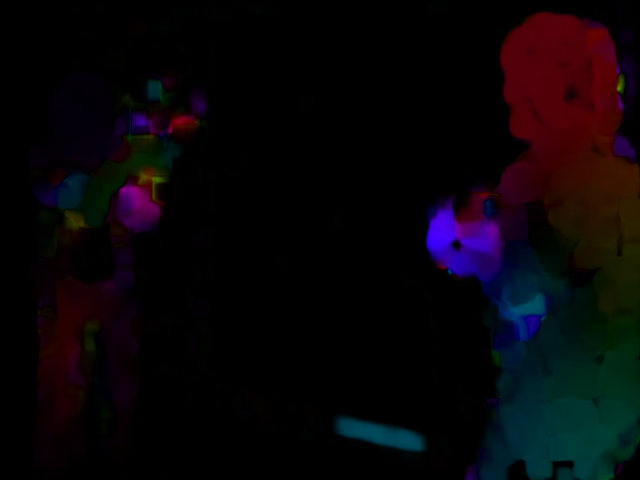

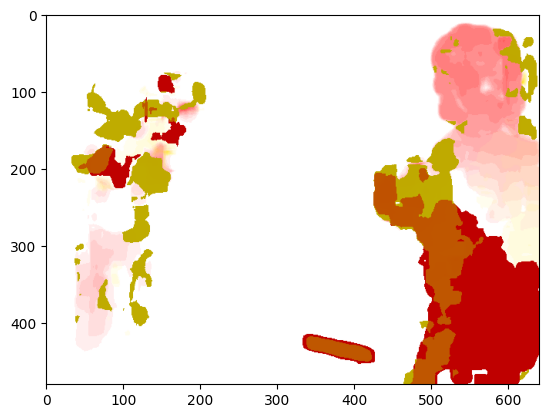

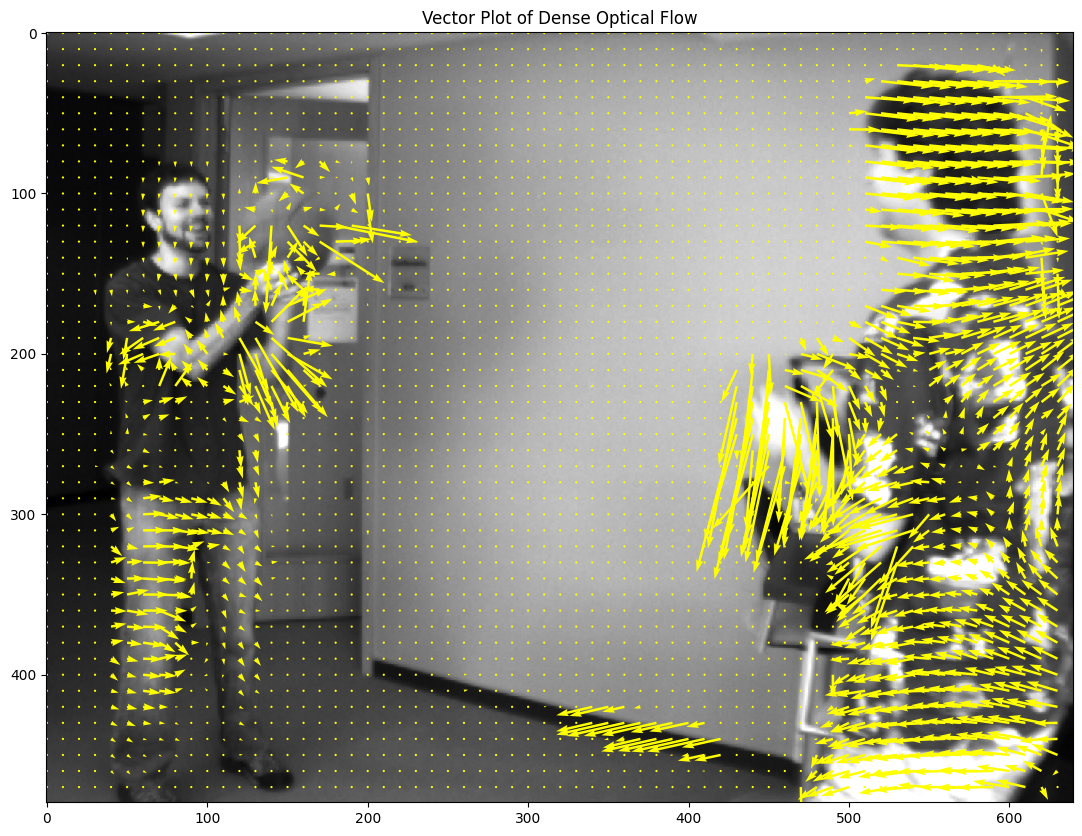

In [ ]:

prvs = cv2.imread("frame10.png", cv2.IMREAD_GRAYSCALE).astype(float)
hsv = np.zeros( (h,w,3), dtype = np.uint8)
hsv[..., 1] = 255
next = cv2.imread("frame11.png", cv2.IMREAD_GRAYSCALE).astype(float)
flow = cv2.calcOpticalFlowFarneback(prvs, next, None, 0.5, 3, 15, 3, 5, 1.2, 0)
mag, ang = cv2.cartToPolar(flow[..., 0], flow[..., 1])
hsv[..., 0] = ang*180/np.pi/2
hsv[..., 2] = cv2.normalize(mag, None, 0, 255, cv2.NORM_MINMAX)
bgr = cv2.cvtColor(hsv, cv2.COLOR_HSV2BGR)
cv2_imshow(bgr)
cv2.imwrite('opticalfb.png', next)
cv2.imwrite('opticalhsv.png', bgr)

flow_uv = np.zeros( (h,w,2), dtype = np.uint8)
flow_uv[...,0] = flow[..., 0]
flow_uv[...,1] = flow[..., 1]
flow_color = flow_vis.flow_to_color(flow_uv, convert_to_bgr=False)
plt.imshow(flow_color)
plt.show()

u, v = flow[..., 0], flow[..., 1]
imgInit = cv2.imread("frame10.png", cv2.IMREAD_GRAYSCALE).astype(float)
# downsize u and v
u_deci = u[np.ix_(range(0, h, 10), range(0, w, 10))]
v_deci = v[np.ix_(range(0, h, 10), range(0, w, 10))]

# get coordinate for u and v in the original frame
[X,Y] = np.meshgrid(np.arange(w, dtype = 'float64'), np.arange(h, dtype = 'float64'))
X_deci = X[np.ix_(range(0, h, 10), range(0, w, 10))]
Y_deci = Y[np.ix_(range(0, h, 10), range(0, w, 10))]

# plot optical flow field
plt.figure(figsize=(15, 10))
plt.title('Vector Plot of Dense Optical Flow')
plt.imshow(imgInit, cmap = 'gray')
plt.quiver(X_deci, Y_deci, u_deci, v_deci, color='yellow')
plt.show()